**Passos para criar um perceptron usando TensorFlow:**
*   Importar as bibliotecas necessárias
*   Carregar e preparar o dataset
*   Definir e compilar o modelo do perceptron
*   Treinar o modelo
*   Avaliar o modelo

Importando as bibliotecas e carregando o dataset: Importamos o TensorFlow para criar o modelo e funções do scikit-learn para manipular o dataset e realizar a padronização.

In [31]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
#from sklearn.metrics import accuracy_score

In [32]:
# Carregar e preparar o dataset
iris = load_iris()
X = iris.data
y = iris.target

# Vamos converter o problema em uma classificação binária (separar classe 0 de 1 e 2)
y = (y != 0).astype(int)


In [33]:
# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train)
print("oi")
print(X_test)

[[-1.47393679  1.20365799 -1.56253475 -1.31260282]
 [-0.13307079  2.99237573 -1.27600637 -1.04563275]
 [ 1.08589829  0.08570939  0.38585821  0.28921757]
 [-1.23014297  0.75647855 -1.2187007  -1.31260282]
 [-1.7177306   0.30929911 -1.39061772 -1.31260282]
 [ 0.59831066 -1.25582892  0.72969227  0.95664273]
 [ 0.72020757  0.30929911  0.44316389  0.4227026 ]
 [-0.74255534  0.98006827 -1.27600637 -1.31260282]
 [-0.98634915  1.20365799 -1.33331205 -1.31260282]
 [-0.74255534  2.32160658 -1.27600637 -1.44608785]
 [-0.01117388 -0.80864948  0.78699794  0.95664273]
 [ 0.23261993  0.75647855  0.44316389  0.55618763]
 [ 1.08589829  0.08570939  0.55777524  0.4227026 ]
 [-0.49876152  1.87442714 -1.39061772 -1.04563275]
 [-0.49876152  1.4272477  -1.27600637 -1.31260282]
 [-0.37686461 -1.47941864 -0.01528151 -0.24472256]
 [ 0.59831066 -0.58505976  0.78699794  0.4227026 ]
 [ 0.72020757  0.08570939  1.01622064  0.8231577 ]
 [ 0.96400139 -0.13788033  0.38585821  0.28921757]
 [ 1.69538284  1.20365799  1.36

In [34]:
# Criar o modelo de rede neural
net = Sequential()
# Adicionar a camada de entrada (e primeira camada oculta) com 256 neurônios
#net.add(Dense(25, input_shape=(3,), activation='relu'))
net.add(Dense(25, input_shape=(X_train.shape[1],), activation='relu'))
net.add(Dense(50, activation='relu'))
net.add(Dense(1, activation='softmax'))

In [35]:
# Resumo do modelo
net.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 25)                125       
_________________________________________________________________
dense_13 (Dense)             (None, 50)                1300      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 51        
Total params: 1,476
Trainable params: 1,476
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Compilar o modelo
net.compile(tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [37]:
# Treinar o modelo
history = net.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
4/4 [==============================] - 1s 134ms/step - loss: 0.5124 - accuracy: 0.6656 - val_loss: 0.2334 - val_accuracy: 0.6667
Epoch 2/100
4/4 [==============================] - 0s 56ms/step - loss: 0.2162 - accuracy: 0.6260 - val_loss: 0.0748 - val_accuracy: 0.6667
Epoch 3/100
4/4 [==============================] - 0s 51ms/step - loss: 0.0662 - accuracy: 0.7021 - val_loss: 0.0229 - val_accuracy: 0.6667
Epoch 4/100
4/4 [==============================] - 0s 45ms/step - loss: 0.0264 - accuracy: 0.7063 - val_loss: 0.0073 - val_accuracy: 0.6667
Epoch 5/100
4/4 [==============================] - 0s 48ms/step - loss: 0.0069 - accuracy: 0.6208 - val_loss: 0.0026 - val_accuracy: 0.6667
Epoch 6/100
4/4 [==============================] - 0s 42ms/step - loss: 0.0025 - accuracy: 0.6667 - val_loss: 0.0011 - val_accuracy: 0.6667
Epoch 7/100
4/4 [==============================] - 0s 51ms/step - loss: 9.3325e-04 - accuracy: 0.6781 - val_loss: 5.4865e-04 - val_accuracy: 0.6667
Epoch 8/100

In [38]:
# Avaliar o modelo
test_loss, test_acc = net.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

1/1 [==============================] - 0s 136ms/step - loss: 2.6157e-05 - accuracy: 0.6667
Test accuracy: 0.6667


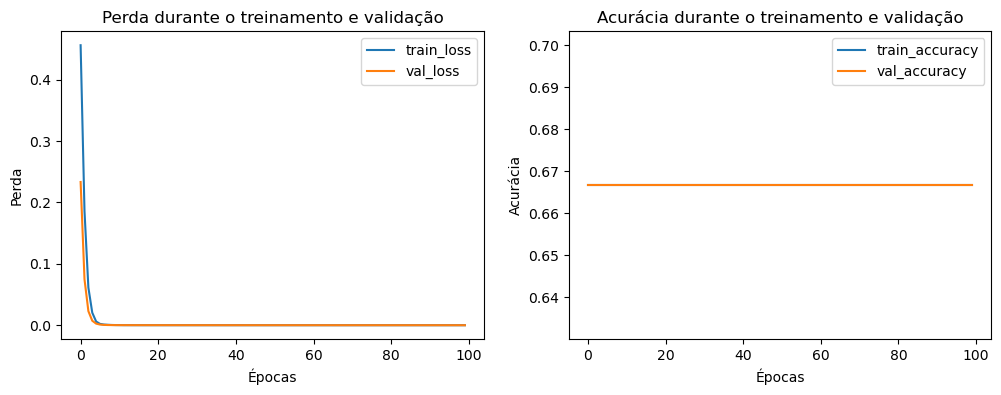

In [39]:
# Plotar as curvas de perda e acurácia
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Perda durante o treinamento e validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Acurácia durante o treinamento e validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.show()

In [40]:
# Salvar o modelo treinado
net.save("petroleo.keras")

Exercícios
¶
1) Altere o valor do hiperparâmetro num_hiddens e veja como esse hiperparâmetro influencia seus resultados. Determine o melhor valor deste hiperparâmetro, mantendo todos os outros constantes.

2) Experimente adicionar uma camada oculta adicional para ver como isso afeta os resultados.

3) Como mudar a taxa de aprendizado altera seus resultados? Corrigindo a arquitetura do modelo e outros hiperparâmetros (incluindo o número de épocas), qual taxa de aprendizado oferece os melhores resultados?

4) Qual é o melhor resultado que você pode obter otimizando todos os hiperparâmetros (taxa de aprendizagem, número de épocas, número de camadas ocultas, número de unidades ocultas por camada) em conjunto?

5) Descreva por que é muito mais difícil lidar com vários hiperparâmetros.

6) Qual é a estratégia mais inteligente que você pode imaginar para estruturar uma pesquisa em vários hiperparâmetros?